## 1. Introducción a Pytorch

Pytorch es una librería de alto rendimiento diseñada para calcular derivadas de forma automática, lo cual es esencial para el entrenamiento de modelos de **Deep Learning**. Adicionalmente, esta librería tiene una interfaz simple y conveniente para realizar los cálculos en la GPU, lo que permite acelerar los cómputos de manera considerable. En este tutorial, se van a presentar algunos de los conceptos más importantes para utilizar Pytorch en el entrenamiento de redes neuronales.

En Pytorch, la principal estructura de datos son los [**tensores**](https://pytorch.org/docs/stable/tensors.html), los cuales son muy similares a las matrices y arreglos de **NumPy**. A continuación, se presentan algunas de las formas más relevantes para crear tensores:

In [ ]:
#Run it in your local env:

# !pip install torch
# !pip install nltk
# !pip install gensim
# !pip install numpy
# !pip install datasets
# !pip install scipy

In [1]:
import torch

# Creación de un tensor
print('Crear un simple tensor')
tensor = torch.tensor([1])
print('torch.tensor([1]) =', tensor)
print('')

print('Crear un tensor en ceros')
tensor = torch.zeros((2, 2)) # Inicializar un tensor con 2 filas y dos columnas en cero
print('torch.zeros((2, 2)) =\n', tensor)
print('')

print('Crear un tensor con unos')
tensor = torch.ones((2, 2)) # Inicializar un tensor con 2 filas y dos columnas en uno
print('torch.zeros((2, 2)) =\n', tensor)
print('')

print('Crear un tensor con dos dimensiones')
tensor = torch.tensor([[1, 2, 3], [3, 2, 1]])
print(tensor)
print('')

print('Ver la forma del tensor')
print('tensor.shape = ', tensor.shape) # Dos filas, 3 columnas
print('')

print('Tensor con valores (enteros) aleatorios entre 0  y 5')
tensor = torch.randint(0, 6, (4,))
print(tensor)
print('')

print('Tensor con valores aleatorios generados a partir de una distribución normal con media 0 y varianza 1')
tensor = torch.randn((3,2))
print(tensor)
print('')

Crear un simple tensor
torch.tensor([1]) = tensor([1])

Crear un tensor en ceros
torch.zeros((2, 2)) =
 tensor([[0., 0.],
        [0., 0.]])

Crear un tensor con unos
torch.zeros((2, 2)) =
 tensor([[1., 1.],
        [1., 1.]])

Crear un tensor con dos dimensiones
tensor([[1, 2, 3],
        [3, 2, 1]])

Ver la forma del tensor
tensor.shape =  torch.Size([2, 3])

Tensor con valores (enteros) aleatorios entre 0  y 5
tensor([3, 0, 2, 5])

Tensor con valores aleatorios generados a partir de una distribución normal con media 0 y varianza 1
tensor([[ 2.4319,  0.4981],
        [-1.3434, -0.2792],
        [ 0.7468,  0.2312]])



Algunos métodos de los tensores:

In [2]:
print('Transformar a Numpy')
tensor = torch.randn((3,2)).numpy()
print(tensor)
print('')

print('Sumar los valores')
tensor = torch.ones((3,2)).sum()
print(tensor)
print('')

print('Sumar los valores por fila')
tensor = torch.ones((3,2)).sum(1)
print(tensor)
print('')

print('Promedio por columna')
tensor = torch.randn((3,2)).mean(0)
print(tensor)
print('')

print('Ver el tensor de otro manera. Verlo como vector')
tensor = torch.randn((2,2)).view(-1) # lo vismo que .view(4) porque el -1 representa el número necesario para encajar en una sola dimensión
print(tensor)
print('')

print('Transponer un tensor')
tensor = torch.randn((3,2)).t()
print(tensor)
print('')

print('Multiplicación de matrices')
tensor = torch.randn((2,3)) @ torch.randn((3,2)) # [2, 3] @ [3, 2] = [2, 2]
print(tensor)
print('')

print('Concatenar 2 tensores en la última dimensión')
tensor = torch.cat((torch.ones((2,2)), torch.randn((2,2))), dim=1) # tensor.shape = [2,4]
print(tensor)
print('')

print('Índices funcionan similar a numpy')
tensor = torch.ones((2, 2))[:,0] # Todas las filas solo la primera columna
print(tensor)
print('')

Transformar a Numpy
[[-0.0865927   0.3857414 ]
 [ 0.4277188  -0.46427876]
 [-0.6017307  -0.8507757 ]]

Sumar los valores
tensor(6.)

Sumar los valores por fila
tensor([2., 2., 2.])

Promedio por columna
tensor([1.3072, 0.1720])

Ver el tensor de otro manera. Verlo como vector
tensor([ 1.8479, -0.8007, -0.2278,  0.4071])

Transponer un tensor
tensor([[-0.0892,  0.1266, -0.6696],
        [-0.5748, -2.9837, -0.9428]])

Multiplicación de matrices
tensor([[ 1.2968, -0.3465],
        [ 0.9827, -0.1173]])

Concatenar 2 tensores en la última dimensión
tensor([[ 1.0000,  1.0000, -0.9348,  1.0216],
        [ 1.0000,  1.0000,  0.5845, -0.7356]])

Índices funcionan similar a numpy
tensor([1., 1.])



Una de las principales razones para utilizar Pytorch para implementar redes neuronales, es su capacidad de auto diferenciación, es decir, su capacidad de calcular las derivadas de manera automática, lo que permite el uso de diversas técnicas de optimización basadas en el gradiente para el entrenamiento de estas redes. A continuación se presenta un ejemplo de cómo utilizar este mecanismo:

In [3]:
# Si tenemos 2x + 3x + x = y, la derivada de y con respecto a x será de 2+3+1=6
x = torch.randn((1,), requires_grad=True) # x es un número cualquiera, y se debe indicar que se va a calcular la derivada con respecto a x mediante requires_grad=True
y_  = torch.tensor([2, 3, 1]) * x # y_ = [2, 3, 1] * x, donde por broadcasting (similar a numpy https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html#in-brief-tensor-broadcasting)
# y_ = [2, 3, 1] * x =  [2, 3, 1] * [x, x, x] = [2x, 3x, 1x]
y = y_.sum() # y = 2x + 3x + x
print('Valor de y:', y)

# Pedir a Pytorch que calcule la derivada de y con respecto a las variables que tienen requires_grad=True
y.backward()

# Derivada de y con respecto a x
print('dy/dx =', x.grad)

Valor de y: tensor(5.8282, grad_fn=<SumBackward0>)
dy/dx = tensor([6.])


Puede ver más información sobre la diferenciación automática en Pytorch [aquí](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html). Adicionalmente, se recomienda que realice el [tutorial básico de Pytorch](https://pytorch.org/tutorials/beginner/basics/intro.html).

## 2. Reproducir un modelo de lenguaje de n-gramas con redes neuronales

En esta sección, vamos a intentar simular un modelo de lenguaje de bigramas mediante el uso de redes neuronales.

### Preparar los recursos

1. Instalar los paquetes requeridos.
2. Importar las librerías.
3. Conseguir un pequeño corpus de texto.

In [4]:
# Importación de librerías
import torch.nn.functional as F
import nltk
import gensim
import gensim.downloader
import numpy as np
from datasets import load_dataset

torch.manual_seed(65)
nltk.download('punkt')
nltk.download('punkt_tab')

/home/felipe/Documentos/GitHub/NLP/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /home/felipe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/felipe/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Versiones utilizadas de las librerías importadas

In [5]:
print('Pytorch:', torch.__version__)
print('nltk:', nltk.__version__)
print('gensim:', gensim.__version__)
print('numpy', np.__version__)

Pytorch: 2.6.0+cu124
nltk: 3.9.1
gensim: 4.3.3
numpy 1.26.4


Como corpus de texto tomaremos un fragmento de un artículo de Wikipedia tomado el 31 de julio de 2024: https://en.wikipedia.org/wiki/Spanish_language

In [6]:
sample = """Spanish (español) or Castilian (castellano) is a Romance language of the Indo-European language family that evolved from the Vulgar Latin spoken on the Iberian Peninsula of Europe. Today, it is a global language with about 500 million native speakers, mainly in the Americas and Spain, and about 600 million when including second language speakers. Spanish is the official language of 20 countries, as well as one of the six official languages of the United Nations. Spanish is the world's second-most spoken native language after Mandarin Chinese; the world's fourth-most spoken language overall after English, Mandarin Chinese, and Hindustani (Hindi-Urdu); and the world's most widely spoken Romance language. The country with the largest population of native speakers is Mexico."""
print(sample)

Spanish (español) or Castilian (castellano) is a Romance language of the Indo-European language family that evolved from the Vulgar Latin spoken on the Iberian Peninsula of Europe. Today, it is a global language with about 500 million native speakers, mainly in the Americas and Spain, and about 600 million when including second language speakers. Spanish is the official language of 20 countries, as well as one of the six official languages of the United Nations. Spanish is the world's second-most spoken native language after Mandarin Chinese; the world's fourth-most spoken language overall after English, Mandarin Chinese, and Hindustani (Hindi-Urdu); and the world's most widely spoken Romance language. The country with the largest population of native speakers is Mexico.


Para crear nuestro modelo base (modelo de bigramas), vamos a tokenizar el texto en palabras, transformarlo a minúsculas, eliminar caracteres de puntuación, y conservar únicamente caracteres alfanuméricos.

In [7]:
# Transformación a minúsculas y tokenización en palabras
tokens = nltk.tokenize.word_tokenize(sample.lower(), language='english')
# Eliminar tokens que no corresponden a caracteres alfanuméricos
tokens = [w for w in tokens if w.isalnum()]
# Tokenización del corpus
print(tokens)

['spanish', 'español', 'or', 'castilian', 'castellano', 'is', 'a', 'romance', 'language', 'of', 'the', 'language', 'family', 'that', 'evolved', 'from', 'the', 'vulgar', 'latin', 'spoken', 'on', 'the', 'iberian', 'peninsula', 'of', 'europe', 'today', 'it', 'is', 'a', 'global', 'language', 'with', 'about', '500', 'million', 'native', 'speakers', 'mainly', 'in', 'the', 'americas', 'and', 'spain', 'and', 'about', '600', 'million', 'when', 'including', 'second', 'language', 'speakers', 'spanish', 'is', 'the', 'official', 'language', 'of', '20', 'countries', 'as', 'well', 'as', 'one', 'of', 'the', 'six', 'official', 'languages', 'of', 'the', 'united', 'nations', 'spanish', 'is', 'the', 'world', 'spoken', 'native', 'language', 'after', 'mandarin', 'chinese', 'the', 'world', 'spoken', 'language', 'overall', 'after', 'english', 'mandarin', 'chinese', 'and', 'hindustani', 'and', 'the', 'world', 'most', 'widely', 'spoken', 'romance', 'language', 'the', 'country', 'with', 'the', 'largest', 'popula

### 2.1 Construcción del modelo base (modelo de bigramas)

A continuación, vamos a construir una clase para entrenar nuestro modelo de bigramas. Este modelo va a calcular la probabilidad $P(W_{t+1}|W_t)$, es decir, la probabilidad de la siguiente palabra únicamente basado en la palabra anterior. Para encontrar esta probabilidad, el modelo realiza la siguiente aproximación $P(W_{t+1}|W_t)\approx\frac{C(W_t,W_{t+1})}{C(W_t)}$ en donde $C(W_i)$ representa el número de ocurrencias de la palabra $W_i$ en el corpus.

Como el objetivo es utilizar el modelo de bigramas para predecir la siguiente palabra, vamos a incluir en la clase el método `__call__` para predecir la siguiente palabra por cada uno de los ejemplos que se pasen a esta función. La siguiente palabra que predice el modelo corresponde simplemente a la palabra con mayor probabilidad.

In [8]:
class NGramModel:
    def __init__(self):
        self.bigrams = {}
        self.unigrams = {}

    # Se pasa el corpus completo para entrenar el modelo
    def train(self, x):
        # Se crean parejas que representan a todos los bigramas observados en el corpus
        for pair in  zip(x[:-1],x[1:]):
            # Se cuentan las ocurrencias de bigramas
            self.bigrams[pair] = self.bigrams.get(pair, 0) + 1
            # Se cuentan las ocurrencias de unigramas
            self.unigrams[pair[0]] = self.unigrams.get(pair[0], 0) + 1
        # Arriba se agregaron todos los unigramas observados en x[:-1] por lo que hace falta por incluir la última palabra
        self.unigrams[pair[1]] = self.unigrams.get(pair[1], 0) + 1

    # Se recibe una serie de palabras, y por cada una de ellas se predice la palabra siguiente
    def __call__(self, x):
        preds = []
        # Se itera sobre cada una de las palabras recibidas
        for tok in x:
            # Se filtran los bigramas para conserva solo los que inician con la palabra recibida
            bigrams = [pair for pair in self.bigrams if pair[0] == tok]
            # Se busca el bigrama con mayor ocurrencia
            max_bigram = max(bigrams, key=self.bigrams.get)
            # Se toma la segunda palabra del bigrama como la palabra predicha
            next_tok = max_bigram[1]
            # Se agrega al array de resultados
            preds.append(next_tok)
        return preds

    # Calcular la probalidad de un bigrama
    def get_p(self, bigram):
        return self.bigrams[tuple(bigram)] / self.unigrams[bigram[0]]

# Crear y entrenar el modelo
bigrams_model = NGramModel()
bigrams_model.train(tokens)

Comprobemos que nuestro modelo de bigramas funcione correctamente. Para lograrlo, podemos calcular la probabilidad de algunos bigramas de forma manual y compararlas con las probabilidades calculadas por nuestro modelo.

In [9]:
# Conteo manual
clean_sample = ' '.join(tokens)

p1 = clean_sample.count(' of the ') / clean_sample.count(' of ')
print(f'P(the|of) = {p1}')

p2 = clean_sample.count(' language of ') / clean_sample.count(' language ')
print(f'P(of|language) = {p2}')

P(the|of) = 0.5
P(of|language) = 0.25


In [10]:
# Probabilidades calculadas por el modelo
p1 = bigrams_model.get_p(('of', 'the'))
print(f'P(the|of) = {p1}')

p2 = bigrams_model.get_p(('language', 'of'))
print(f'P(of|language) = {p2}')

P(the|of) = 0.5
P(of|language) = 0.25


### 2.2. Primera aproximación al modelo de bigramas con redes neuronales

Tras implementar el modelo de bigramas, y comprobar su correcto funcionamiento, vamos a utilizar redes neuronales para intentar simular un modelo de bigramas. Para conseguirlo, podemos entrenar una red neuronal en la que planteemos un problema para el cual la solución óptima sea el modelo de bigramas.

En este caso, vamos a crear un modelo neuronal que va a recibir como entrada una palabra, con el objetivo de predecir acertadamente la siguiente palabra. Es decir, que le vamos a pedir al modelo que calcule $P(W_{t+1}|W_t)$ donde $W_t$ es la palabra número $t$ en la secuencia de texto. Dado que el modelo solo tiene disponible la información de la palabra anterior, esperamos que las probabilidades que el modelo asigne a cada una de las posibles palabras siguientes sea muy similar a la probabilidad calculada por un modelo de bigramas.

Para implementar el modelo necesitamos preguntarnos cómo conseguir que nuestra red neuronal reciba una palabra, y cómo lograr que el modelo sea capaz de indicarnos la palabra siguiente. Es decir, ¿cómo le indicamos al modelo que estámos hablando de la palabra "hola"?, ¿cómo el modelo nos indica que la palabra que predice es "que"?

Una forma sencilla de hacerlo es creando un vocabulario y asignando un id a cada una de las palabras.

In [11]:
# El vocabulario está conformado por todas las palabras presentes en el corpus
vocabulary = sorted(list(set(tokens)))
# Se asigna un id a cada una de las palabras
stoi = {word: idx for idx, word in enumerate(vocabulary)}
# Se crea otro diccionario para transformar un id en la palabra correspondiente
itos = {idx: word for idx, word in enumerate(vocabulary)}

# Transformamos el corpus a una lista de números según los índices creados para cada palabra
encoded_corpus = [stoi[tok] for tok in tokens]
print('Primeros 10 tokens:', encoded_corpus[:10])

# Queremos que el modelo sea capaz de predecir la siguiente palabra
for idx in range(10):
    print(f'Para [{encoded_corpus[idx]}] prediga -> [{encoded_corpus[idx+1]}]')

Primeros 10 tokens: [50, 15, 42, 10, 9, 25, 3, 46, 27, 38]
Para [50] prediga -> [15]
Para [15] prediga -> [42]
Para [42] prediga -> [10]
Para [10] prediga -> [9]
Para [9] prediga -> [25]
Para [25] prediga -> [3]
Para [3] prediga -> [46]
Para [46] prediga -> [27]
Para [27] prediga -> [38]
Para [38] prediga -> [54]


Adicionalmente, para entrenar nuestro modelo vamos a utilizar lotes (batches) de entrenamiento, de manera que el modelo pueda ver varios ejemplos al tiempo que le permita tener una señal de aprendizaje de buena calidad. Como lo mencionamos anteriormente, cada uno de los ejemplos se compone por una palabra y su etiqueta (palabra siguiente).

In [12]:
# Tamaño del lote
batch_size = 32
# Corpus codificado
encoded_corpus = torch.tensor(encoded_corpus)

class DataLoader:
    def __init__(self, corpus, block_size):
        self.corpus = corpus
        self.block_size = block_size
        # Crear índices aleatorios para recorrer el dataset
        self.perm = torch.randperm(len(corpus)-block_size) # Restar el tamaña del contexto para tener ejemplos completos con su etiqueta
        self.batch = 0

    def get_batch(self, batch_size):
        # Tomar los índices aleatorios de tamaño del batch
        idx = self.perm[self.batch:self.batch+batch_size]
        # Aumentar el puntero para recorrer el dataset sin reemplazos (recorrerlo completo)
        self.batch += batch_size
        # En caso de que se recorra todo el dataset, recorrerlo nuevamente en otro orden
        if (self.batch > len(self.perm)):
            # Reorganizar el dataset
            self.perm = torch.randperm(len(self.corpus)-self.block_size)
            # Completar el batch con la nueva reorganización
            batch_to_complete = self.batch - len(self.perm)
            idx = torch.cat((idx, self.perm[0:batch_to_complete]))
            # Actualizar el puntero
            self.batch = batch_to_complete

        x = self.corpus[idx] # Traer los ids de las palabras correspondientes a las posiciones definidas aleatoriamente
        y = self.corpus[idx+1] # Traer los ids de las palabras siguientes (etiquetas)
        return x, y

In [13]:
dataloader = DataLoader(encoded_corpus, 1)
dataloader.get_batch(batch_size)

(tensor([34, 22, 46, 54, 58, 40, 17,  2, 54, 44, 16, 36, 54, 30, 34,  7, 27, 54,
         51, 50, 42, 61, 57, 28, 61, 41, 54,  4, 54, 11,  6, 38]),
 tensor([59, 44, 27, 13,  8, 54, 19, 34, 27, 38, 55, 50, 62, 52, 37, 21, 38, 48,
         50, 25, 10,  4, 30, 38, 54, 38, 29,  1, 56,  7,  7, 54]))

Finalmente, creemos una función para evaluar la precisión de los modelos en la tarea de predecir la siguiente palabra.

In [14]:
def eval_accuracy(model):
    preds = 0
    matches = 0
    # Evaluar los aciertos del modelo en 10 lotes aleatorios
    for i in range(10):
        # Traer los datos del lote
        x, y = dataloader.get_batch(batch_size)
        # Generar las predicciones con el modelo
        y_pred = torch.tensor(model(x))

        # Sumar el número de predicciones realizadas
        preds += len(x)
        # Sumar el número de aciertos
        matches += (y_pred.int() == y).sum().item()

    # Calcular el accuracy del modelo
    return matches/preds

# Evaluar el desempeño del modelo base
# Entrenemos nuevamente el modelo de bigramas, pero entrenado en los ids en vez de las palabras como tal
bigrams_model = NGramModel()
bigrams_model.train(encoded_corpus.numpy())
# Calculemos el accuracy del modelo base
eval_accuracy(bigrams_model)

0.634375

Volvamos a la implementación de nuestro primer modelo con redes neuronales.

Por el momento, tenemos un id (número entero) como representación de cada una de las palabras. Así, que un primer intento podría ser utilizar un modelo de regresión lineal, en donde nuestro modelo utilice el id como dato de entrada y genere un id como salida.

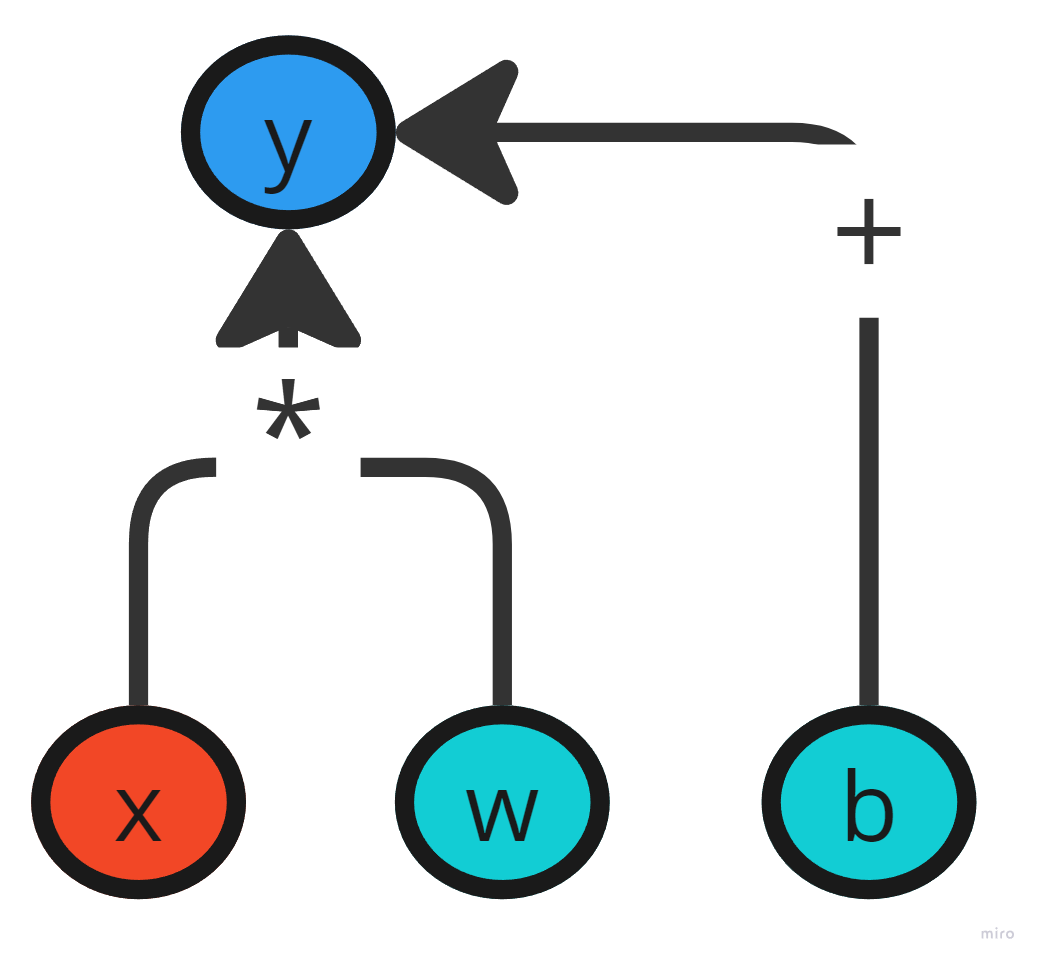

In [15]:
# Por cada ejemplo del lote, nuestro modelo haría lo siguiente:
# id_salida = (id_entrada * w) + b
# w y b serían los parámetros del modelo, que en este caso serían los dos números que nuestro modelo debe encontrar

# Inicializamos w de forma aleatoria
w = torch.randn((1,), requires_grad=True)
print('w', w)
# Inicializamos b de forma aleatoria
b = torch.zeros((1,), requires_grad=True)
print('b', b)

# Datos de entrada y etiquetas
x, y = dataloader.get_batch(batch_size)

# El modelo predice un numero por cada ejemplo (palabra anterior) que vamos a interpretar como el id de la palabra siguiente
y_pred = x*w + b
print(f'El modelo genera {len(y_pred)} predicciones por cada uno de los {batch_size} ejemplos.')
print('El modelo predice numeros reales, que luego podemos aproximar a números enteros para poderlos interpretar como el id de la siguiente palabra')
print(y_pred)

w tensor([1.2537], requires_grad=True)
b tensor([0.], requires_grad=True)
El modelo genera 32 predicciones por cada uno de los 32 ejemplos.
El modelo predice numeros reales, que luego podemos aproximar a números enteros para poderlos interpretar como el id de la siguiente palabra
tensor([68.9543, 73.9691, 60.1783,  8.7760, 38.8651, 51.4023, 65.1931, 40.1188,
        27.5817, 66.4468, 31.3428, 67.7005, 67.7005, 67.7005, 33.8503, 71.4617,
        21.3131,  3.7611, 61.4320, 33.8503, 75.2228, 31.3428, 37.6114, 50.1486,
        13.7909,  8.7760, 65.1931, 35.1040,  6.2686, 47.6411, 77.7303, 62.6857],
       grad_fn=<AddBackward0>)


Para entrenar el modelo vamos a utilizar gradiente descendiente estocástico (SGD), y vamos a utilizar la función de pérdida [Mean Absolute Error (MAE)](https://es.wikipedia.org/wiki/Error_absoluto_medio) , en la que simplemente calculamos la diferencia absoluta entre el id de la palabra siguiente y el número predicho por nuestro modelo.

In [16]:
# Modelo de regresión lineal
def LR(x):
    return x*w + b

# Se entrena el modelo por 100 pasos
for i in range(100):
    x, y = dataloader.get_batch(batch_size)
    y_pred = LR(x)

    # MAE como función de pérdida
    loss = ((y - y_pred).abs()).mean()
    print(f'step {i+1} - loss: {loss:.2f}')

    # Actualizar los parámetros del modelo
    w.grad = None # Limpiar el gradiente
    b.grad = None # Limpiar el gradiente
    loss.backward() # Calcular el gradiente
    lr = 0.01 # Tasa de aprendizaje
    w.data -= lr * w.grad # Actualización del peso
    b.data -= lr * b.grad # Actualización del peso

step 1 - loss: 22.12
step 2 - loss: 22.31
step 3 - loss: 20.05
step 4 - loss: 16.28
step 5 - loss: 17.59
step 6 - loss: 19.14
step 7 - loss: 16.37
step 8 - loss: 23.43
step 9 - loss: 18.26
step 10 - loss: 16.16
step 11 - loss: 20.97
step 12 - loss: 19.19
step 13 - loss: 19.73
step 14 - loss: 20.07
step 15 - loss: 18.44
step 16 - loss: 19.21
step 17 - loss: 16.81
step 18 - loss: 22.28
step 19 - loss: 17.75
step 20 - loss: 15.83
step 21 - loss: 21.55
step 22 - loss: 22.09
step 23 - loss: 17.07
step 24 - loss: 14.59
step 25 - loss: 13.83
step 26 - loss: 21.86
step 27 - loss: 22.13
step 28 - loss: 20.57
step 29 - loss: 18.15
step 30 - loss: 17.06
step 31 - loss: 24.39
step 32 - loss: 16.33
step 33 - loss: 18.37
step 34 - loss: 16.97
step 35 - loss: 21.31
step 36 - loss: 20.01
step 37 - loss: 14.65
step 38 - loss: 16.77
step 39 - loss: 22.22
step 40 - loss: 18.79
step 41 - loss: 20.13
step 42 - loss: 16.58
step 43 - loss: 17.03
step 44 - loss: 23.80
step 45 - loss: 16.82
step 46 - loss: 20.

In [17]:
# Evaluamos el desempeño del modelo de regresión lineal
eval_accuracy(LR)

/tmp/ipykernel_20279/2796547727.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(model(x))


0.009375

Como se puede observar este problema es muy difícil de resolver para el modelo implementado (el modelo base obtiene un accuracy de 0.6).

### 2.3. Segunda aproximación (representaciones vectoriales)

Una de las principales limitaciones de nuestro modelo anterior, es que nuestro modelo solo usa un id como representación de las palabras. Una alternativa, sería utilizar una representación de las palabras más rica en información. Un ejemplo de este tipo de representación son las representaciones de bolsas de palabras, o mejor aún, incrustaciones pre-entrenadas tipo Word2Vec o Glove.

In [18]:
# Descargamos incrustaciones tipo Glove pre-entrenadas
glove_embeddings_300 = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


Estas incrustaciones son una representación de 300 dimensiones de 400 mil palabras.

In [19]:
glove_embeddings_300['language']

array([-6.7832e-01, -2.8658e-01, -2.8904e-01,  1.5099e-01, -4.6720e-01,
       -1.7424e-01, -7.7790e-01,  3.5469e-01,  6.9431e-02, -1.7409e+00,
       -4.8699e-03,  3.2813e-01, -5.5443e-01,  5.1388e-01,  5.3065e-01,
        2.3718e-02,  2.2542e-01,  7.6866e-01,  1.8348e-01,  1.6765e-01,
       -1.5293e-01, -2.7201e-01, -5.3389e-02,  1.0727e+00, -4.6678e-01,
       -2.4596e-01,  1.9205e-01, -7.6138e-02,  3.9775e-02,  1.6546e-01,
        6.4188e-02,  4.1207e-01, -4.1290e-01,  8.8176e-01, -6.5510e-01,
       -1.9994e-01,  2.8036e-01, -8.3058e-01,  1.0374e-02,  2.5017e-01,
       -2.7072e-01, -5.8058e-02,  4.0706e-01, -2.3871e-01,  1.8965e-01,
       -4.7930e-02, -2.0027e-01,  8.7983e-01, -1.5852e-01, -2.8104e-01,
        1.5497e-01, -4.3207e-02,  4.2794e-01, -8.6033e-01, -2.6242e-01,
       -1.0455e-02,  2.3501e-01, -6.6707e-01,  9.1331e-01,  5.2429e-01,
        5.8939e-01,  5.7586e-01,  5.5180e-01,  7.6329e-03, -8.5204e-03,
        3.0554e-01,  7.6697e-01,  5.9108e-01,  7.0538e-01,  1.12

Para encontrar la incrustación de cada una de las palabras de una forma conveniente, podemos organizar las incrustaciones con base en el orden de nuestro vocabulario. De modo, que luego podamos traer las incrustaciones de las palabras que nos interesan mediante los ids de las palabras.

In [20]:
# Creamos una matriz con las incrustaciones en el órden del vocabulario
E = torch.tensor(np.array([glove_embeddings_300[word] for word in vocabulary]))
print(E.shape) # Tenemos una matriz en donde cada fila corresponde a la incrustación de la palabra i del vocabulario, esta matriz tiene tamaño vocabulario X dim_incrustación

torch.Size([63, 300])


Si queremos obtener la incrustación de una palabra podemos obtenerla facilmente mediante el índice de la palabra:

In [22]:
word_id = encoded_corpus[0] # Primera palabra en el corpus
print(word_id, vocabulary[word_id])

# Incrustación correspondiente
print(E[word_id].shape)

# Verificamos que seleccionamos la incrustación correcta
print((E[word_id] == torch.tensor(glove_embeddings_300[vocabulary[word_id]])).all())

tensor(50) spanish
torch.Size([300])
tensor(True)


Tener un tensor con las incrustaciones de las palabras de esta manera, nos permite encontrar las incrustaciones de nuestro lote de ejemplos de una manera rápida:

In [23]:
E[x].shape

torch.Size([32, 300])

In [24]:
# Verificamos que efectivamente hayamos traído el embedding correspondiente a la primera palabra del corpus
(E[x][0] == E[x[0]]).all()

tensor(True)

De la anterior manera, logramos pasar de tener una representación por cada ejemplo de una dimensión (id de la palabra) a tener una representación de 300 dimensiones.

Utilicemos esta nueva representación para entrenar el mismo modelo de regresión lineal.

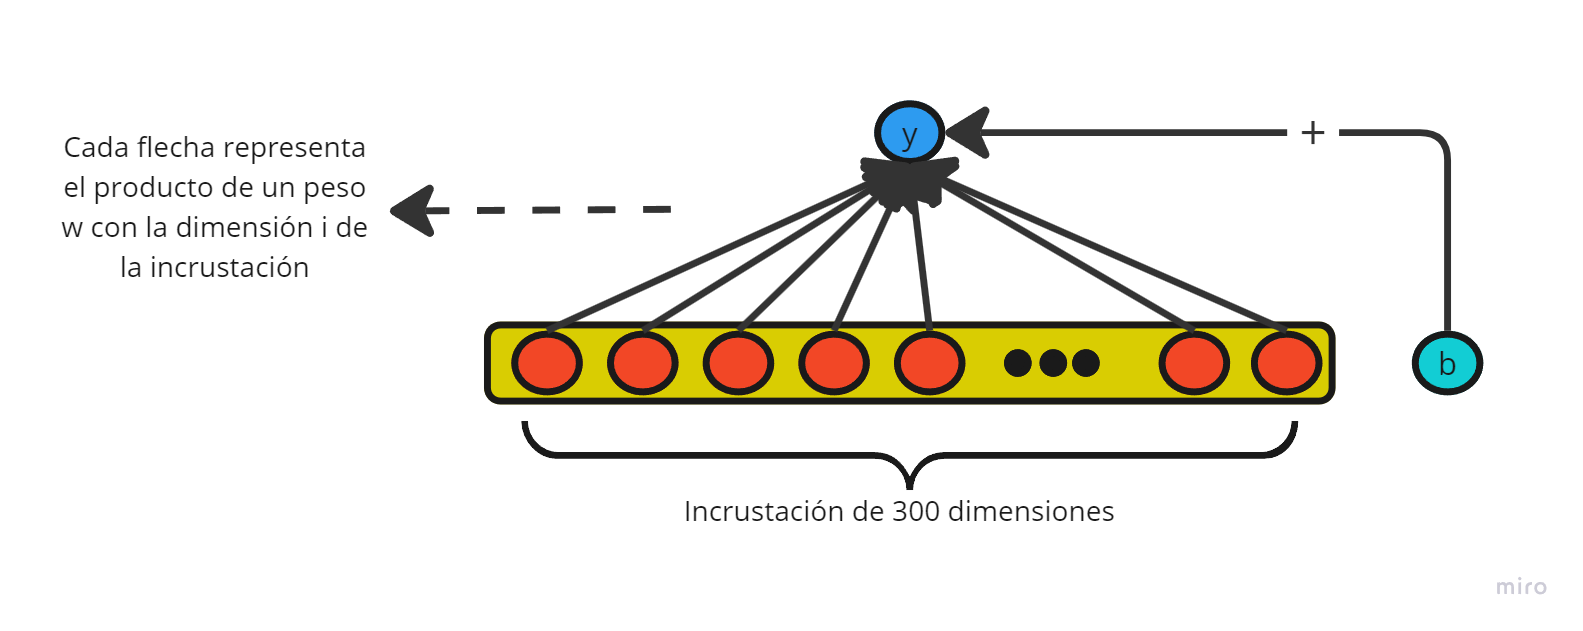

In [25]:
# Cada dimensión ahora tiene su propio peso, por lo que pasamos de tener 1 a 300 pesos más el bias que se define abajo
W = torch.randn((300,1), requires_grad=True)
print('w', W.shape)
b = torch.zeros((1,), requires_grad=True)
print('b', b) # El bias tendría una sola dimensión
# El modelo ahora tiene la siguiente forma: id_palabra_siguiente = x1*w1 + x2*w2 + x3*w3 + ... + x300*w300 + b

# Modelo
x, y = dataloader.get_batch(batch_size) # X = [32] ids de palabras, Y = [32] ids de palabras siguientes
embedded = E[x] # [32, 300] cada palabra se representa con un vector de 300 números

# Predecimos para cada uno de los ejemplos el id de la palabra siguiente
y_pred = embedded @ W + b  # [32, 300] @ [300, 1] + [1] = [32, 1]
print(f'El modelo genera predicciones de la forma {y_pred.shape}')
print('El modelo predice numeros reales, que luego podemos aproximar a números enteros para poderlos interpretar como el id de la siguiente palabra')
print(y_pred)

w torch.Size([300, 1])
b tensor([0.], requires_grad=True)
El modelo genera predicciones de la forma torch.Size([32, 1])
El modelo predice numeros reales, que luego podemos aproximar a números enteros para poderlos interpretar como el id de la siguiente palabra
tensor([[ 6.6649],
        [ 0.0961],
        [-6.5613],
        [-3.8532],
        [-0.8999],
        [10.0844],
        [-3.7119],
        [ 4.5851],
        [-0.8181],
        [-3.6241],
        [ 3.9671],
        [ 3.6464],
        [ 7.5920],
        [-0.6061],
        [-5.2264],
        [ 2.6867],
        [ 3.2922],
        [-3.4098],
        [ 7.2104],
        [10.0844],
        [ 3.2922],
        [-2.3296],
        [ 4.5851],
        [ 3.2922],
        [-0.6674],
        [-0.6674],
        [-0.6674],
        [-6.1123],
        [ 6.1185],
        [-0.6674],
        [ 4.5851],
        [-4.9485]], grad_fn=<AddBackward0>)


In [26]:
def MultiLR(x):
    embedded = E[x]
    return (embedded @ W + b).view(-1)

for i in range(10000): # Se entrena el modelo por 10000 pasos
    x, y = dataloader.get_batch(batch_size)

    y_pred = MultiLR(x)

    # MAE como loss
    loss = ((y - y_pred).abs()).mean()
    print(f'step {i+1} - loss: {loss:.2f}')

    # Actualizar los parámetros del modelo
    W.grad = None # Limpiar el gradiente
    b.grad = None # Limpiar el gradiente
    loss.backward() # Calcular el gradiente
    lr = 0.01 # Tasa de aprendizaje
    W.data -= lr * W.grad # Actualización del peso
    b.data -= lr * b.grad # Actualización del peso

step 1 - loss: 33.31
step 2 - loss: 32.55
step 3 - loss: 33.78
step 4 - loss: 29.08
step 5 - loss: 31.32
step 6 - loss: 35.20
step 7 - loss: 29.83
step 8 - loss: 30.89
step 9 - loss: 31.22
step 10 - loss: 32.29
step 11 - loss: 35.21
step 12 - loss: 29.71
step 13 - loss: 26.92
step 14 - loss: 33.73
step 15 - loss: 35.72
step 16 - loss: 27.18
step 17 - loss: 32.56
step 18 - loss: 35.28
step 19 - loss: 31.71
step 20 - loss: 31.26
step 21 - loss: 28.40
step 22 - loss: 28.15
step 23 - loss: 28.86
step 24 - loss: 32.50
step 25 - loss: 34.46
step 26 - loss: 29.59
step 27 - loss: 27.78
step 28 - loss: 26.82
step 29 - loss: 35.93
step 30 - loss: 28.20
step 31 - loss: 28.97
step 32 - loss: 31.58
step 33 - loss: 27.37
step 34 - loss: 28.38
step 35 - loss: 32.03
step 36 - loss: 34.42
step 37 - loss: 27.18
step 38 - loss: 27.18
step 39 - loss: 32.27
step 40 - loss: 32.62
step 41 - loss: 26.87
step 42 - loss: 30.85
step 43 - loss: 25.04
step 44 - loss: 29.34
step 45 - loss: 27.65
step 46 - loss: 29.

Evaluar las predicciones

In [27]:
eval_accuracy(MultiLR)

/tmp/ipykernel_20279/2796547727.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(model(x))


0.125

Con una simple transformación lineal sobre las incrustaciones, el desempeño del modelo mejora radicalmente (10X). Sin embargo, el desempeño sigue siendo bajo debido a la limitada capacidad de los modelos lineales. Además, nuestra función de pérdida actual considera la distancia entre el id predicho y el id real, lo cual no es del todo apropiado porque si el id que queremos predecir es 50, nuestro modelo piensa que es mejor predecir la palabra con id 40 que la palabra con id 10, cuando realmente en los dos casos el modelo está igual de equivocado. Por otro lado, predecir el próximo id no es una tarea tan deseable como predecir una distribución de probabilidad sobre todo el vocabulario. Esta última, nos permitiría realizar una generación de lenguaje no determinística en la que varias palabras podrían encajar bien y no solo una, lo cual tiene una mayor similitud con el lenguaje humano.

### 2.4. Tercera aproximación (Modelo de lenguaje con regresor multi lineal)

Para hablar de un modelo de lenguaje, el modelo debe tener la capacidad de generar una distribución de probabilidad sobre todo el vocabulario. Por esta razón, vamos a implementar un modelo cuya capa final no sea un solo número sino un vector del tamaño del vocabulario. Adicionalmente, utilizaremos la función softmax para normalizar los valores de modo que cada valor pueda ser interpretado como la probabilidad de que esa palabra sea la siguiente.

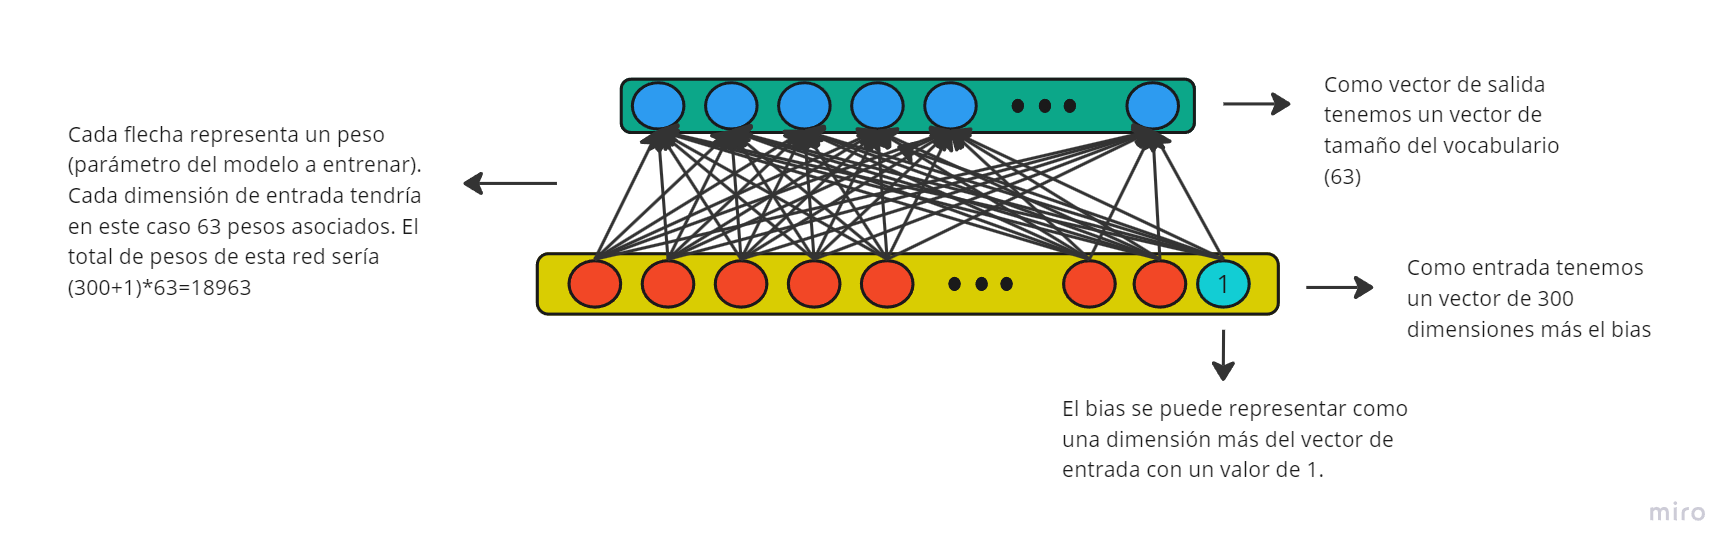

In [28]:
# Ahora la matriz de pesos es de tamaño embed_dim X vocabulario
W = torch.randn((300, len(vocabulary)), requires_grad=True)
print('w', W.shape)
b = torch.zeros((len(vocabulary),), requires_grad=True)
print('b', b.shape) # El bias tiene el tamaño del vocabulario

# Modelo
x, y = dataloader.get_batch(batch_size)
embedded = E[x] #  [batch X embed_dim]
y_pred = embedded @ W + b  # [batch X embed_dim] @ [embed_dim X vocabulario] + [vocabulario] = [batch X vocabulario] + [vocabulario] = [batch X vocabulario]

print(f'El modelo genera predicciones de la forma {y_pred.shape}') # Un número por cada palabra en el vocabulario
print('El modelo predice numeros reales, que luego podemos normalizar para interpretarlos como probabilidades')
probs = F.softmax(y_pred, dim=1)
print(f'Para cada uno de los 32 ejemplos, la suma de las probabilidades asignadas a cada una de las palabras del vocabulario debe ser igual a 1: {F.softmax(y_pred, dim=1).sum(1)}')

w torch.Size([300, 63])
b torch.Size([63])
El modelo genera predicciones de la forma torch.Size([32, 63])
El modelo predice numeros reales, que luego podemos normalizar para interpretarlos como probabilidades
Para cada uno de los 32 ejemplos, la suma de las probabilidades asignadas a cada una de las palabras del vocabulario debe ser igual a 1: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)


Adicionalmente, debemos cambiar la función de pérdida debido a que ya no estamos interesados en evaluar la diferencia entre el id predicho y el id real de la palabra siguiente, sino que queremos maximizar la probabilidad que asigna nuestro modelo a la palabra que realmente sigue. En consecuencia, vamos a usar la función de pérdida conocida como ["Cross Entropy"](https://en.wikipedia.org/wiki/Cross-entropy), o "Maximum Log Likelihood".

In [29]:
def MultiLR(x):
    embedded = E[x]
    return embedded @ W + b

for i in range(100): # Se entrena el modelo por 100 pasos
    x, y = dataloader.get_batch(batch_size)

    y_pred = MultiLR(x)

    # Loss
    loss = F.cross_entropy(y_pred, y) # A esta función se deben pasar los logits, i.e., la predicción del modelo antes de normalizarlos con Softmax
    print(f'step {i+1} - loss: {loss:.2f}')

    # Actualizar los parámetros del modelo
    W.grad = None # Limpiar el gradiente
    b.grad = None # Limpiar el gradiente
    loss.backward() # Calcular el gradiente
    lr = 0.01 # Tasa de aprendizaje
    W.data -= lr * W.grad # Actualización del peso
    b.data -= lr * b.grad # Actualización del peso

step 1 - loss: 13.16
step 2 - loss: 14.67
step 3 - loss: 14.93
step 4 - loss: 13.95
step 5 - loss: 15.57
step 6 - loss: 14.34
step 7 - loss: 12.72
step 8 - loss: 13.60
step 9 - loss: 13.42
step 10 - loss: 14.45
step 11 - loss: 15.79
step 12 - loss: 14.00
step 13 - loss: 11.22
step 14 - loss: 16.98
step 15 - loss: 15.31
step 16 - loss: 13.98
step 17 - loss: 14.58
step 18 - loss: 13.91
step 19 - loss: 12.71
step 20 - loss: 13.45
step 21 - loss: 14.96
step 22 - loss: 14.70
step 23 - loss: 14.12
step 24 - loss: 14.09
step 25 - loss: 14.17
step 26 - loss: 13.33
step 27 - loss: 14.33
step 28 - loss: 12.71
step 29 - loss: 14.99
step 30 - loss: 12.05
step 31 - loss: 13.49
step 32 - loss: 16.45
step 33 - loss: 13.48
step 34 - loss: 13.66
step 35 - loss: 13.76
step 36 - loss: 14.15
step 37 - loss: 12.48
step 38 - loss: 14.29
step 39 - loss: 14.26
step 40 - loss: 14.89
step 41 - loss: 12.44
step 42 - loss: 14.48
step 43 - loss: 13.27
step 44 - loss: 12.65
step 45 - loss: 14.85
step 46 - loss: 14.

In [30]:
def eval_accuracy_from_logits(model):
    preds = 0
    matches = 0
    for i in range(10): # Se evalúa el modelo en 10 lotes aleatorios
        x, y = dataloader.get_batch(batch_size)
        y_pred = model(x).argmax(dim=1) # Se toma como predicción la palabra con mayor probabilidad

        preds += len(x)
        matches += (y_pred == y).sum().item()

    return matches/preds

In [31]:
eval_accuracy_from_logits(MultiLR)

0.0

Como se puede evidenciar, los modelos lineales no tienen la capacidad de modelar tareas complejas como el lenguaje. Es por esto, que las redes neuronales se han vuelto tan populares en PLN.

### 2.5. Cuarta aproximación: MLP como modelo de lenguaje

Los modelos de redes neuronales se caracterizan por el uso de funciones no lineales. Así, que como última aproximación al modelo de bigramas, vamos a implementar un Multi-Layer Perceptron ([MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron)), es decir, un modelo neuronal con al menos una capa oculta y funciones de activación no lineales.

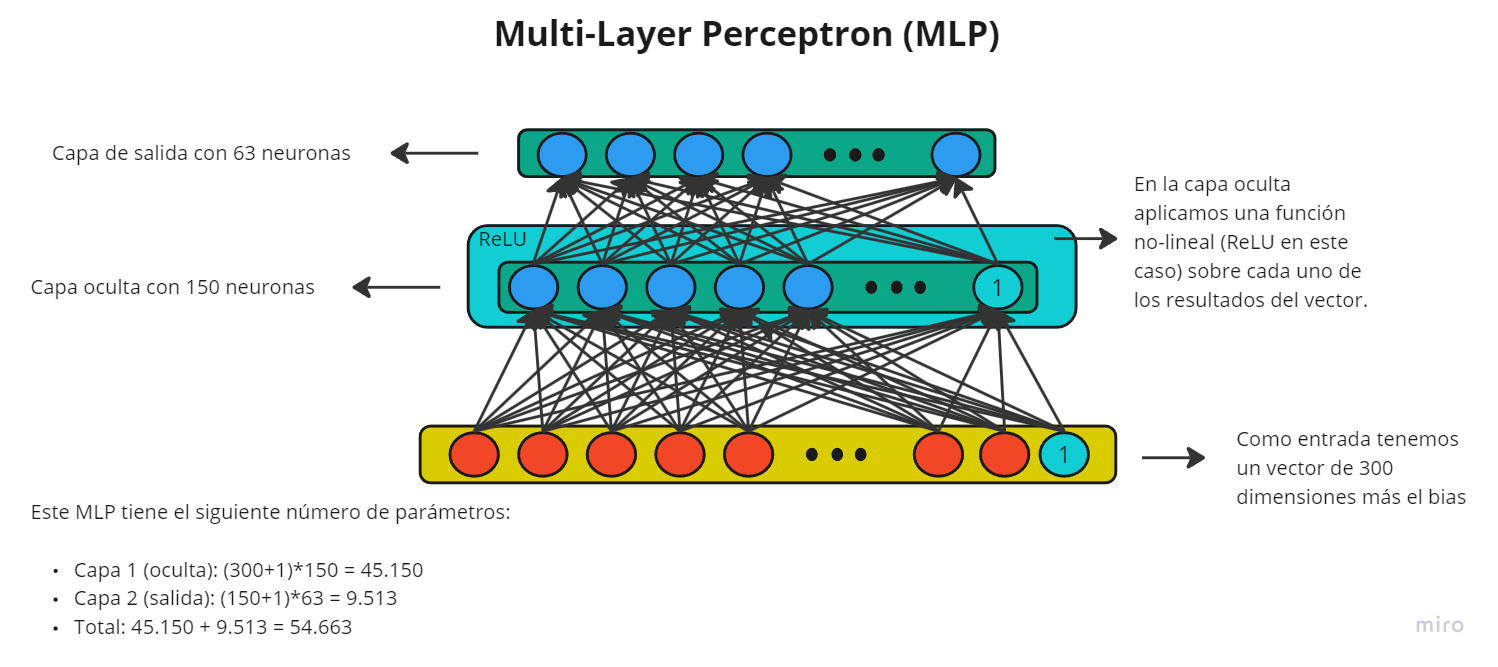

In [32]:
# Parámetros de la capa oculta (capa 1)
W1 = torch.randn((300,150), requires_grad=True)
b1 = torch.zeros((150,), requires_grad=True)
# Parámetros de la capa final (capa 2)
W2 = torch.randn((150,len(vocabulary)), requires_grad=True)
b2 = torch.zeros((len(vocabulary),), requires_grad=True)

# Modelo
x, y = dataloader.get_batch(batch_size)
embedded = E[x] # [32, 300]
print(embedded.shape)
hidden_layer = embedded @ W1 + b1 # [32, 300] @ [300, 150] + [150] = [32, 150] Resultado de la primera capa
hidden_layer = F.relu(hidden_layer) # Aplicamos la función de activación no-lineal, en este caso ReLU
print(hidden_layer.shape)
preds = hidden_layer @ W2 + b2 # [32, 150] @ [150, vocabulario] + [vocabulario] = [32, vocabulario] Resultado de la segunda capa
print(preds.shape) # Predecimos para cada uno de los ejemplos una distribución de probabilidad

torch.Size([32, 300])
torch.Size([32, 150])
torch.Size([32, 63])


In [33]:
# Parameters of the model
parameters = [W2, b2, W1, b1]
lr = 0.0007 # Tasa de aprendizaje

def MLP(x):
    embedded = E[x]
    hidden_layer = embedded @ W1 + b1
    hidden_layer = F.relu(hidden_layer)
    return hidden_layer @ W2 + b2

for i in range(10000): # Se entrena el modelo por 10000 pasos
    x, y = dataloader.get_batch(batch_size)

    y_pred = MLP(x)

    # Loss
    loss = F.cross_entropy(y_pred, y) # A esta función se deben pasar los logits, i.e., la predicción del modelo antes de normalizarlos con Softmax
    print(f'step {i+1} - loss: {loss:.2f}')

    # Actualizar los parámetros del modelo
    # Limpiar el gradiente
    for p in parameters:
        p.grad = None
    # Calcular el gradiente
    loss.backward()
    # Paso de actualización de los pesos
    for p in parameters:
        p.data -= lr * p.grad

step 1 - loss: 100.08
step 2 - loss: 111.86
step 3 - loss: 116.26
step 4 - loss: 100.74
step 5 - loss: 109.82
step 6 - loss: 114.83
step 7 - loss: 110.19
step 8 - loss: 104.63
step 9 - loss: 106.69
step 10 - loss: 108.84
step 11 - loss: 108.89
step 12 - loss: 91.88
step 13 - loss: 118.88
step 14 - loss: 102.25
step 15 - loss: 101.01
step 16 - loss: 114.50
step 17 - loss: 107.20
step 18 - loss: 95.82
step 19 - loss: 104.33
step 20 - loss: 115.07
step 21 - loss: 108.88
step 22 - loss: 98.92
step 23 - loss: 113.86
step 24 - loss: 97.84
step 25 - loss: 102.61
step 26 - loss: 99.62
step 27 - loss: 101.67
step 28 - loss: 119.57
step 29 - loss: 86.92
step 30 - loss: 93.12
step 31 - loss: 117.71
step 32 - loss: 101.16
step 33 - loss: 98.56
step 34 - loss: 99.70
step 35 - loss: 117.52
step 36 - loss: 94.36
step 37 - loss: 102.16
step 38 - loss: 104.08
step 39 - loss: 101.89
step 40 - loss: 99.06
step 41 - loss: 104.31
step 42 - loss: 91.31
step 43 - loss: 105.24
step 44 - loss: 93.26
step 45 - 

In [34]:
eval_accuracy_from_logits(MLP)

0.64375

Alcanzamos e incluso superamos levemente el desempeño de nuestro modelo de bigramas. Veamos si las probabilidades que asigna nuestro modelo son similares a las del modelo de bigramas

In [35]:
# Queremos buscar la palabra con mayor probabilidad de seguir despues de "of"
sample1 = torch.tensor([[stoi['of']]])

logits = MLP(sample1)
# Usemos la función softmax para convertir los logits en probabilidades
probs = F.softmax(logits, dim=-1)

next_tok = itos[probs.argmax().item()]
print(f'La palabra con mayor probabilidad que continúa la plabra "of" es "{next_tok}" según el modelo MLP')
print('Con una probabilidad de ', probs.max().item())

# Queremos buscar la palabra con mayor probabilidad de seguir despues de "language"
sample2 = torch.tensor([[stoi['language']]])

logits = MLP(sample2)
# Usemos la función softmax para convertir los logits en probabilidades
probs = F.softmax(logits, dim=-1)

next_tok = itos[probs.argmax().item()]
print(f'La palabra con mayor probabilidad que continúa la plabra "language" es "{next_tok}" según el modelo MLP')
print('Con una probabilidad de ', probs.max().item())

La palabra con mayor probabilidad que continúa la plabra "of" es "the" según el modelo MLP
Con una probabilidad de  0.49568453431129456
La palabra con mayor probabilidad que continúa la plabra "language" es "of" según el modelo MLP
Con una probabilidad de  0.2662874460220337


Estos resultados son muy cercanos a los de nuestro modelo de bigramas original:

In [36]:
next_tok_id = bigrams_model(sample1.numpy())[0]
next_tok = itos[next_tok_id]
print(f'La palabra con mayor probabilidad que continúa la plabra "of" es "{next_tok}" según el modelo de bigramas')
print('Con una probabilidad de ', bigrams_model.get_p((stoi['of'], next_tok_id)))

next_tok_id = bigrams_model(sample2.numpy())[0]
next_tok = itos[next_tok_id]
print(f'La palabra con mayor probabilidad que continúa la plabra "language" es "{next_tok}" según el modelo de bigramas')
print('Con una probabilidad de ', bigrams_model.get_p((stoi['language'], next_tok_id)))

La palabra con mayor probabilidad que continúa la plabra "of" es "the" según el modelo de bigramas
Con una probabilidad de  0.5
La palabra con mayor probabilidad que continúa la plabra "language" es "of" según el modelo de bigramas
Con una probabilidad de  0.25


Adicionalmente, con el MLP construido se tiene la ventaja de que sin aplicar ningun tipo de suavizado, nuestro modelo asigna una probabilidad mayor a 0 a todos los tokens del vocabulario. Por otro lado, este modelo es la base de todas las arquitecturas modernas para crear modelos de lenguaje, por lo que es fácilmente extendible, y veremos a lo largo del curso diferentes arquitecturas para mejorar el desempeño en la tarea de predecir el siguiente token.

## 3. Construcción de un modelo de lenguaje en un corpus más grande con una arquitectura mejorada

Para este tutorial, haremos uso del corpus "TinyStories" que se compone de pequeños cuentos infantiles en inglés. El dataset se encuentra originalmente en Hugging Face, puede verlo  [aquí](https://huggingface.co/datasets/roneneldan/TinyStories).

In [37]:
# Descargamos el dataset
dataset = load_dataset("roneneldan/TinyStories", split='train')

Generating validation split: 100%|██████████| 21990/21990 [00:00<00:00, 166545.83 examples/s]


Tokenizamos el texto de la misma manera que lo hicimos en el anterior corpus. Tokenizando en palabras, y transformando a minúsculas, pero esta vez no vamos a eliminar los caracteres de puntuación.

In [38]:
def tokenize(text):
    # Transformación a minúsculas y tokenización en palabras
    tokens = nltk.tokenize.word_tokenize(text.lower(), language='english')
    return tokens

# Reducimos el tamaño del dataset conservando únicamente los primeros 10000 cuentos
dataset = dataset['text'][:10000]

# Tokenizamos cada uno de los cuentos
tokenized_dataset = [tokenize(doc) for doc in dataset]

Generamos el vocabulario del corpus.

In [39]:
vocabulary = []
# Recorrer cada uno de los cuentos
for doc in tokenized_dataset:
    vocabulary.extend(doc)
vocabulary = sorted(list(set(vocabulary)))

Se agrega el token `<endoftext>` que se usará para delimitar el fin de cada uno de los cuentos.

In [40]:
vocabulary.append('<endoftext>')
len(vocabulary)

10165

Se crean funciones para codificar y decodificar los tokens (palabras en este caso).

In [41]:
stoi = {s:i for i,s in enumerate(vocabulary)}
itos = {i:s for i,s in enumerate(vocabulary)}

encode = lambda tokens: [stoi[tok] for tok in tokens]
decode = lambda encoded: ' '.join([itos[idx.item()] for idx in encoded])

Codificamos el corpus:

In [42]:
encoded_corpus = []
for doc in tokenized_dataset:
    encoded_corpus.extend(encode(doc)) # Codificamos cada cuento
    encoded_corpus.append(stoi['<endoftext>']) # Agregamos el token especial al final del cuento

Se crea una función para extraer ejemplos aleatorios del corpus en donde en vez de solo usar una palabra vamos a utilizar 4 palabras como contexto (información) para que nuestro modelo genere la predicción de la siguiente palabra.

In [43]:
class DataLoader:
    def __init__(self, corpus, block_size):
        self.corpus = corpus
        self.block_size = block_size
        # Crear índices aleatorios para recorrer el dataset
        self.perm = torch.randperm(len(corpus)-block_size) # Restar el tamaña del contexto para tener ejemplos completos con su etiqueta
        self.batch = 0

    def get_batch(self, batch_size):
        # Tomar los índices aleatorios de tamaño del batch
        idx = self.perm[self.batch:self.batch+batch_size]
        # Aumentar el puntero para recorrer el dataset sin reemplazos (recorrerlo completo)
        self.batch += batch_size
        # En caso de que se recorra todo el dataset, recorrerlo nuevamente en otro orden
        if (self.batch > len(self.perm)):
            # Reorganizar el dataset
            self.perm = torch.randperm(len(self.corpus)-self.block_size)
            # Completar el batch con la nueva reorganización
            batch_to_complete = self.batch - len(self.perm)
            idx = torch.cat((idx, self.perm[0:batch_to_complete]))
            # Actualizar el puntero
            self.batch = batch_to_complete

        # Por cada posición tomar 4 palabras como contexto
        x = torch.tensor([self.corpus[i:i+self.block_size] for i in idx])
        # Por cada posición tomar la 5ta palabra como la etiqueta
        y = torch.tensor([self.corpus[i+self.block_size] for i in idx])
        return x, y

In [44]:
batch_size = 64 # Número de ejemplos que se pasan al modelo al mismo tiempo para su entrenamiento
block_size = 4 # Tamaño del contexto. 4 tokens en este caso

dataloader = DataLoader(encoded_corpus, block_size)

A continuación se presenta un ejemplo de lote, en el que se muestran 8 de los 64 ejemplo que verá el modelo en su entrenamiento:

In [45]:
x, y = dataloader.get_batch(batch_size)
print(f'x.shape = {x.shape}, y.shape = {y.shape}')
print('Ejemplos de entrenamiento:')
for i in range(8):
    # Se decodifican los ejemplos para mayor claridad
    print(decode(x[i]), '->', decode([y[i]]))

x.shape = torch.Size([64, 4]), y.shape = torch.Size([64])
Ejemplos de entrenamiento:
stitch . she smiled -> at
truck passed the tree -> and
carefully ! â€ so -> tom
! '' his mom -> smiled
depths of the sea -> .
was a little boy -> named
'' mommy laughed and -> said
n't wait to raise -> her


Anteriormente utilizamos los vectores Glove como una representación de 300 dimensiones de cada una de las palabras en el dataset:

In [46]:
E.shape # [vocabulario X dimensiones]

torch.Size([63, 300])

Examinando esta matriz, podemos darnos cuenta que es una matriz de números reales de tamaño [vocabulario X dimensiones]. En razón de lo cual nuestro modelo podría entrenar esta matriz desde cero, es decir, que mediante gradiente descendiente nuestro modelo podría aprender las representaciones de cada palabra más apropiadas para predecir la siguiente palabra. Esta idea es un concepto fundamental de las arquitecturas modernas, y se usa en los populares modelos GPT de OpenAI.

In [47]:
E

tensor([[-0.4130,  0.1615, -0.0898,  ..., -0.5738, -0.3177, -0.2548],
        [-0.4235,  0.4836,  0.1053,  ..., -0.0612,  0.1208, -0.2513],
        [-0.5147,  0.5861, -0.0628,  ...,  0.2549, -0.0019, -0.2824],
        ...,
        [ 0.2961,  0.2426,  0.5232,  ..., -0.6801, -0.5559, -0.3396],
        [-0.5042,  0.3107,  0.1428,  ..., -0.4410, -0.0087, -0.2264],
        [-0.2583,  0.4364, -0.1138,  ...,  0.0817, -0.0044, -0.1410]])

Por otro lado, anteriormente utilizamos la representación de una palabra para predecir la siguiente. Así, nuestro modelo usó 300 números reales como entrada para predecir las probabilidades de que cada una de las palabras de nuestro vocabulario sea la siguiente.

En este ocasión, queremos que nuestro modelo haga uso de 4 palabras previas (contexto) para predecir la palabra siguiente, lo que implica que busquemos alguna estrategia para combinar las representaciones de las 4 palabras para conformar un único vector que representa el contexto.

Implementemos el modelo!

In [48]:
class MLP_LM:
    def __init__(self, emb_dim, vocab_size, block_size, hidden_layer_size) -> None:
        self.block_size = block_size # Tamaño del contexto
        self.emb_dim = emb_dim # Tamaño de las representaciones que vamos a generar por cada palabra

        self.E = torch.randn(vocab_size, emb_dim) # Matriz de incrustaciones incializada de manera aleatoria
        self.W1 = torch.randn(block_size*emb_dim, hidden_layer_size) * (block_size*emb_dim)**-0.5 # Pesos de la capa oculta inicializados de manera aleatoria
        self.b1 = torch.zeros((hidden_layer_size,)) # Bias de la capa oculta inicializados en cero
        self.W2 = torch.randn(hidden_layer_size, vocab_size) * hidden_layer_size**-0.5 # Pesos de la capa final inicializados de manera aleatoria
        # Note como no se agrega el bias en la capa final, lo cual es común

        # Parámetros del modelo: pesos entrenables del modelo
        self.parameters = [self.E, self.W1, self.b1, self.W2]
        # Indicar a Pytorch que más adelante se va a pedir la derivada con respecto a estos parámetros
        for p in self.parameters:
            p.requires_grad = True

    # Método forward: Método encargado de hacer el paso hacia adelante del modelo, es decir, calcular las predicciones de acuerdo a los ejemplos que se reciban
    def forward(self, x): # Se recibe de entrada [batch, block_size], para cada ejemplo se reciben 4 palabras representadas con su id
        x = self.E[x] # [batch, block_size, embed_dim] ahora cada palabra se representa por emb_dim dimensiones en vez de su id
        x = x.view(-1, self.block_size*self.emb_dim) # Se concatenan las representaciones de las palabras -> [batch, block_size*embed_dim]
        x = x @ self.W1 + self.b1 # [batch, block_size*embed_dim] @ [block_size*embed_dim, hidden_layer_size] + [hidden_layer_size] -> [batch, hidden_layer_size]
        x = F.relu(x) # Función de activación no-lineal
        logits = x @ self.W2 # [batch, hidden_layer_size] @ [hidden_layer_size, vocab_size] -> [batch, vocab_size]
        return logits

Representación gráfica del modelo:

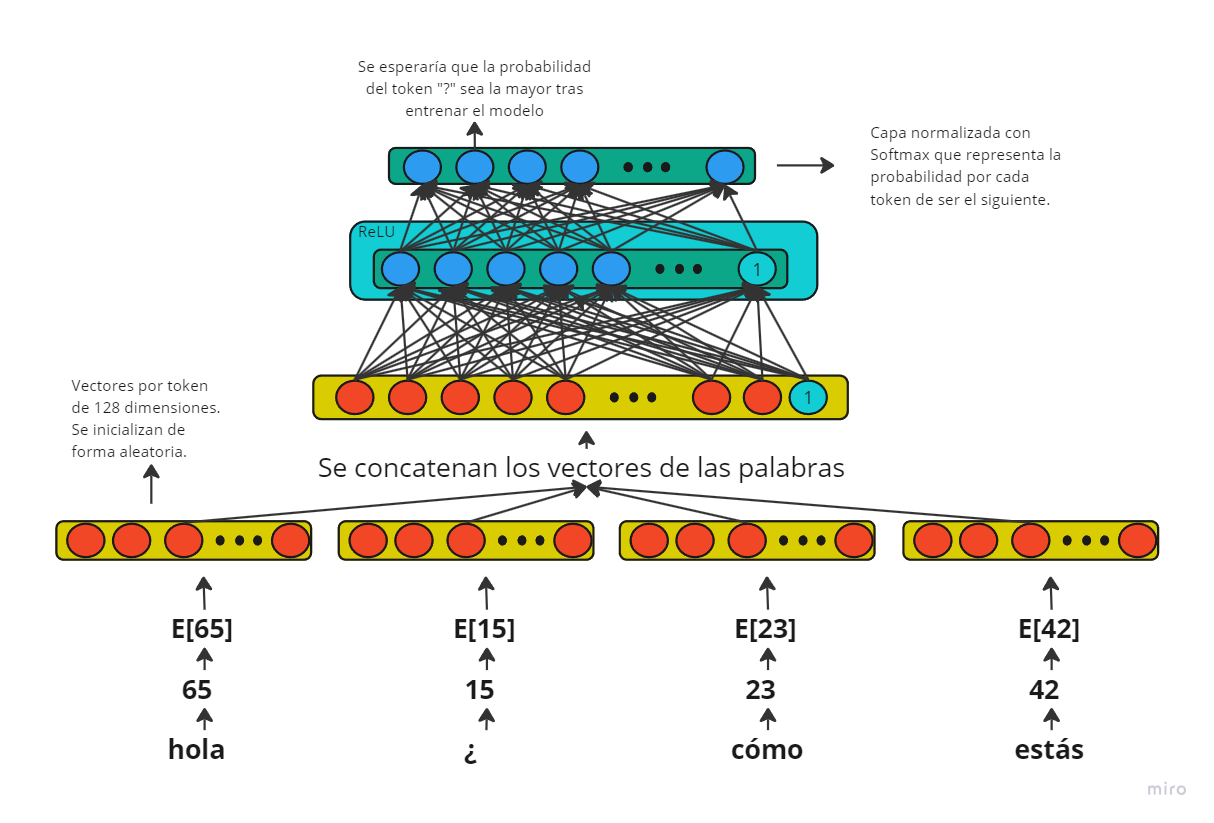

Realicemos el entrenamiento del modelo

**Nota**: Esta celda puede tardar alrededor de 10 minutos en ejecución:

In [49]:
# El modelo aprende una representación de 128 domensiones por palabra, usa 4 palabras de contexto, y tiene una capa oculta con 5096 neuronas
model = MLP_LM(128, len(vocabulary), block_size, 5096)
lr = 0.05 # Tasa de aprendizaje

# Bucle de entrenamiento
for i in range(1000):
    x, y = dataloader.get_batch(batch_size)
    # Predicciones del modelo
    logits = model.forward(x)

    # Cálculo de la función de pérdida
    loss = F.cross_entropy(logits, y)
    print(f'step {i+1} - loss: {loss:.2f}')

    # Actuallización de pesos
    for p in model.parameters: # Limpiar el gradiente
        p.grad = None
    loss.backward() # Calcular el gradiente
    for p in model.parameters: # Actualización
        p.data -= lr * p.grad

step 1 - loss: 9.40
step 2 - loss: 8.57
step 3 - loss: 7.90
step 4 - loss: 8.30
step 5 - loss: 8.50
step 6 - loss: 7.40
step 7 - loss: 7.62
step 8 - loss: 8.44
step 9 - loss: 7.31
step 10 - loss: 7.31
step 11 - loss: 7.25
step 12 - loss: 7.12
step 13 - loss: 7.14
step 14 - loss: 6.12
step 15 - loss: 7.29
step 16 - loss: 8.10
step 17 - loss: 8.72
step 18 - loss: 6.83
step 19 - loss: 8.63
step 20 - loss: 7.02
step 21 - loss: 6.62
step 22 - loss: 6.86
step 23 - loss: 6.88
step 24 - loss: 6.62
step 25 - loss: 7.01
step 26 - loss: 6.94
step 27 - loss: 6.71
step 28 - loss: 6.96
step 29 - loss: 6.47
step 30 - loss: 6.25
step 31 - loss: 6.63
step 32 - loss: 7.10
step 33 - loss: 6.08
step 34 - loss: 6.07
step 35 - loss: 6.11
step 36 - loss: 6.63
step 37 - loss: 6.55
step 38 - loss: 5.96
step 39 - loss: 6.06
step 40 - loss: 5.88
step 41 - loss: 6.29
step 42 - loss: 5.71
step 43 - loss: 7.19
step 44 - loss: 7.03
step 45 - loss: 5.57
step 46 - loss: 6.23
step 47 - loss: 6.33
step 48 - loss: 7.15
s

En los modelos de lenguaje, se prefiere realizar la evaluación sobre las tareas específicas para las cuales va a ser usado el modelo. En este tutorial, simplemente veremos un ejemplo de generación del modelo.

In [50]:
# Contexto para iniciar la generación
seed = 'once upon a time'

# Decorador para informar a Pytorch que no necesitamos que calcule derivadas (esto acelera los cálculos)
@torch.no_grad
def generate(seed, max_tokens=50):
    # Se tokeniza el contexto de ejemplo
    encoded = torch.tensor([[stoi[tok] for tok in tokenize(seed)]])

    # Blucle de generación hasta generar el número de tokens deseado
    while len(encoded[0]) < max_tokens:
        # Predicción del modelo
        logits = model.forward(encoded[:,-block_size:]) # Tomamos los últmos 4 tokens para predecir la siguiente palabra
        probs = F.softmax(logits, dim=-1) # Se calculan las probabilidades de cada uno de los tokens del vocabulario
        next_tok_id = torch.multinomial(probs, 1) # De forma aleatoria (condicionado por las probabilidades calculadas) generamos el próximo token
        # next_tok_id = probs.argmax(dim=-1, keepdim=True) # De manera determinística se podría tomar el token con mayor probabilidad
        encoded = torch.cat((encoded,next_tok_id), dim=1) # Se concatena el nuevo token generado

        if next_tok_id[0].item() == stoi['<endoftext>']: # Se rompe el bucle si se predice el token especial
            break
    return decode(encoded[0]) # Se retorna los tokens decodificados

generate(seed)

'once upon a time , there was a little boy who was mommy and the gifts keep include and chirps with the too was in the room and the until so scared and burned and the laughed â€œi they would my all grew supposed the ruler follow , marvelled toy'